In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

# EX 8

In [2]:
auto = pd.read_csv('data/Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
auto['horsepower'] = pd.to_numeric(auto['horsepower'], 
                                   errors = 'coerce')
auto.fillna(auto.median(), inplace=True)

In [4]:
results = smf.ols('mpg ~ horsepower', 
                  data = auto).fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.597    
Dependent Variable: mpg              AIC:                2401.0205
Date:               2021-09-13 15:16 BIC:                2408.9883
No. Observations:   397              Log-Likelihood:     -1198.5  
Df Model:           1                F-statistic:        588.6    
Df Residuals:       395              Prob (F-statistic): 2.86e-80 
R-squared:          0.598            Scale:              24.656   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     40.0213    0.7245   55.2391  0.0000  38.5969  41.4456
horsepower    -0.1582    0.0065  -24.2619  0.0000  -0.1710  -0.1454
------------------------------------------------------------------
Omnibus:               19.580       Durbin-Watson:          0.904 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       21.101
Skew:                  0.534        Prob(JB):               0.000 
Kurtosis:              3.369        Condition No.:          323   
==================================================================

"""

In [5]:
prediction = results.get_prediction(pd.DataFrame({'horsepower': [98]}))
print(prediction.predicted_mean[0])
print(prediction.conf_int(alpha=0.05)[0])

24.51748123650834
[24.02086254 25.01409993]


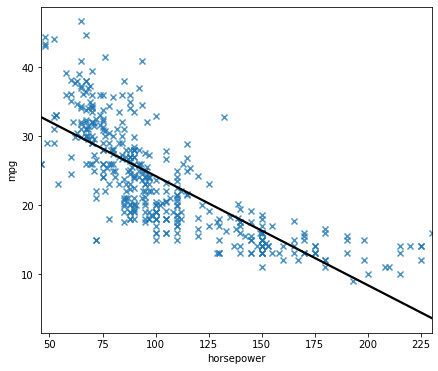

In [6]:
plt.figure(figsize=(7, 6))
sns.regplot(x='horsepower', y='mpg', data=auto, 
            marker='x', ci=None,
            line_kws={'color':'k'})
plt.show()

In [7]:
import statsmodels.api as sm 

In [8]:
def diagonostic_plot(resids, model):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3)

    sm.qqplot(resids.values, fit=True, line='45', ax=axes[0])
    sm.graphics.plot_leverage_resid2(model, marker='x',
                                     alpha=0.001, ax=axes[1])
    plt.show()

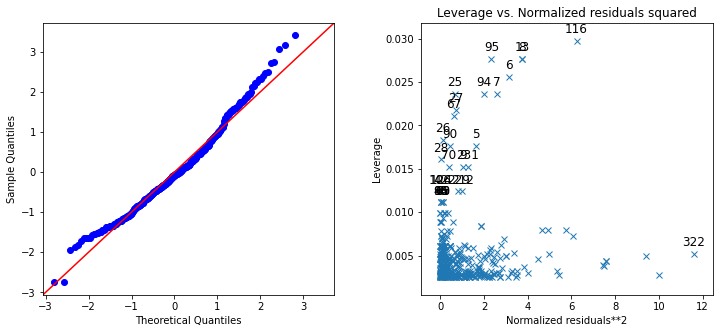

In [9]:
preds = results.predict(auto['horsepower'])
resids = auto['mpg'] - preds

diagonostic_plot(resids, results)

# EX 9

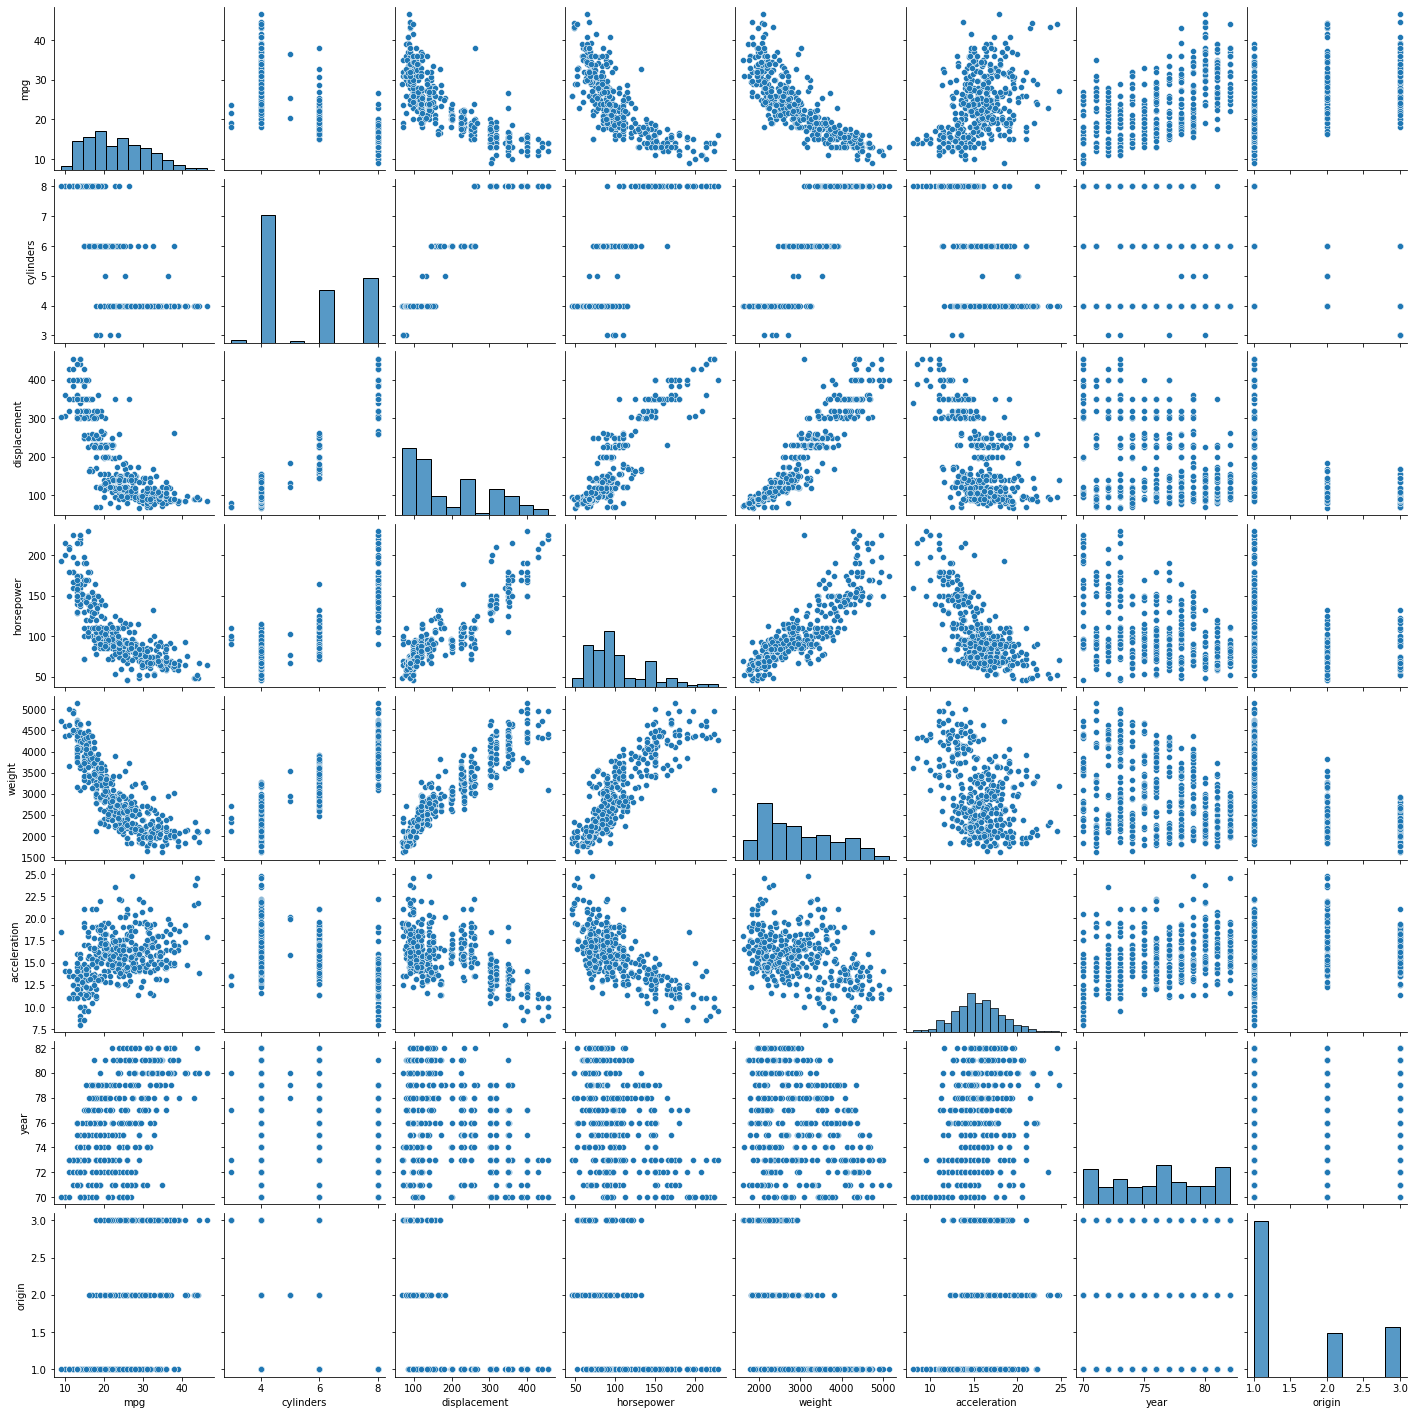

In [10]:
sns.pairplot(auto)
plt.show()

In [11]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.773582,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.841536,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.895765,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.773582,0.841536,0.895765,1.000000,0.862590,-0.688167,-0.413992,-0.452943
weight,-0.831739,0.897017,0.933104,0.862590,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.688167,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.413992,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.452943,-0.581265,0.210084,0.184314,1.000000


In [12]:
formula = 'mpg ~ ' + ' + '.join(auto.columns[1:-1])
results = smf.ols(formula, data = auto).fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.818    
Dependent Variable: mpg              AIC:                2090.6878
Date:               2021-09-13 15:16 BIC:                2122.5593
No. Observations:   397              Log-Likelihood:     -1037.3  
Df Model:           7                F-statistic:        256.1    
Df Residuals:       389              Prob (F-statistic): 2.22e-141
R-squared:          0.822            Scale:              11.116   
------------------------------------------------------------------
                 Coef.   Std.Err.    t     P>|t|   [0.025   0.975]
------------------------------------------------------------------
Intercept       -18.4740   4.6209  -3.9980 0.0001 -27.5590 -9.3891
cylinders        -0.4498   0.3225  -1.3946 0.1639  -1.0840  0.1843
displacement      0.0192   0.0075   2.5545 0.0110   0.0044  0.0339
horsepower       -0.0110   0.0135  -0.8153 0.4154  -0.0376  0.0155
weight           -0.0067   0.0006 -10.4104 0.0000  -0.0080 -0.0054
acceleration      0.1108   0.0975   1.1371 0.2562  -0.0808  0.3025
year              0.7611   0.0506  15.0311 0.0000   0.6615  0.8606
origin            1.4057   0.2760   5.0930 0.0000   0.8631  1.9484
------------------------------------------------------------------
Omnibus:               29.910       Durbin-Watson:          1.292 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       48.012
Skew:                  0.508        Prob(JB):               0.000 
Kurtosis:              4.367        Condition No.:          85588 
==================================================================
* The condition number is large (9e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

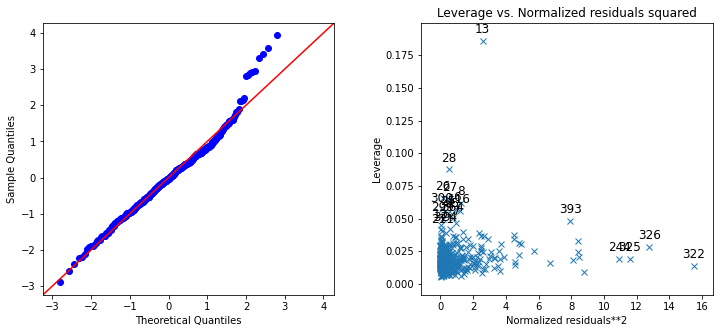

In [13]:
preds = results.predict(auto.drop(['mpg', 'name'], axis=1))
resids = auto['mpg'] - preds

diagonostic_plot(resids, results)

In [14]:
from itertools import combinations

In [15]:
interactions = [comb[0] + ' * ' + comb[1] for comb in combinations(auto.columns[1:-1], 2)]
interactions = list(auto.columns[1:-1]) + interactions
interactions_formula = 'mpg ~ ' + ' + '.join(interactions)

results = smf.ols(interactions_formula, data = auto).fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
============================================================================
Model:                  OLS                 Adj. R-squared:        0.881    
Dependent Variable:     mpg                 AIC:                   1944.0223
Date:                   2021-09-13 15:16    BIC:                   2059.5564
No. Observations:       397                 Log-Likelihood:        -943.01  
Df Model:               28                  F-statistic:           105.4    
Df Residuals:           368                 Prob (F-statistic):    2.72e-157
R-squared:              0.889               Scale:                 7.3058   
----------------------------------------------------------------------------
                           Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
----------------------------------------------------------------------------
Intercept                  38.7532  52.3863  0.7398 0.4599 -64.2609 141.7673
cylinders                   7.0703   8.2479  0.8572 0.3919  -9.1486  23.2892
displacement               -0.4787   0.1895 -2.5256 0.0120  -0.8514  -0.1060
horsepower                  0.4225   0.3273  1.2909 0.1976  -0.2211   1.0660
weight                      0.0080   0.0173  0.4646 0.6425  -0.0260   0.0420
acceleration               -6.3414   2.0910 -3.0327 0.0026 -10.4532  -2.2296
year                        0.6570   0.6042  1.0874 0.2776  -0.5311   1.8452
origin                    -21.6496   7.1086 -3.0456 0.0025 -35.6281  -7.6711
cylinders:displacement     -0.0055   0.0063 -0.8731 0.3832  -0.0180   0.0069
cylinders:horsepower        0.0148   0.0242  0.6132 0.5401  -0.0327   0.0624
cylinders:weight            0.0004   0.0009  0.4647 0.6424  -0.0013   0.0022
cylinders:acceleration      0.2937   0.1659  1.7704 0.0775  -0.0325   0.6200
cylinders:year             -0.1773   0.0972 -1.8238 0.0690  -0.3685   0.0139
cylinders:origin            0.3160   0.4924  0.6417 0.5215  -0.6523   1.2842
displacement:horsepower    -0.0001   0.0003 -0.3212 0.7482  -0.0007   0.0005
displacement:weight         0.0000   0.0000  2.1209 0.0346   0.0000   0.0001
displacement:acceleration  -0.0040   0.0033 -1.1928 0.2337  -0.0105   0.0026
displacement:year           0.0060   0.0024  2.5137 0.0124   0.0013   0.0107
displacement:origin         0.0225   0.0194  1.1605 0.2466  -0.0156   0.0606
horsepower:weight          -0.0000   0.0000 -1.1243 0.2616  -0.0001   0.0000
horsepower:acceleration    -0.0068   0.0037 -1.8210 0.0694  -0.0141   0.0005
horsepower:year            -0.0044   0.0037 -1.1874 0.2358  -0.0118   0.0029
horsepower:origin           0.0049   0.0287  0.1721 0.8634  -0.0515   0.0614
weight:acceleration         0.0002   0.0002  1.0949 0.2743  -0.0002   0.0007
weight:year                -0.0003   0.0002 -1.4033 0.1614  -0.0007   0.0001
weight:origin              -0.0004   0.0016 -0.2569 0.7974  -0.0035   0.0027
acceleration:year           0.0618   0.0247  2.4985 0.0129   0.0132   0.1105
acceleration:origin         0.4627   0.1533  3.0184 0.0027   0.1613   0.7642
year:origin                 0.1459   0.0737  1.9783 0.0486   0.0009   0.2909
----------------------------------------------------------------------------
Omnibus:                45.044          Durbin-Watson:             1.608    
Prob(Omnibus):          0.000           Jarque-Bera (JB):          111.114  
Skew:                   0.566           Prob(JB):                  0.000    
Kurtosis:               5.331           Condition No.:             369965924
============================================================================
* The condition number is large (4e+08). This might indicate
strong multicollinearity or other numerical problems.
"""

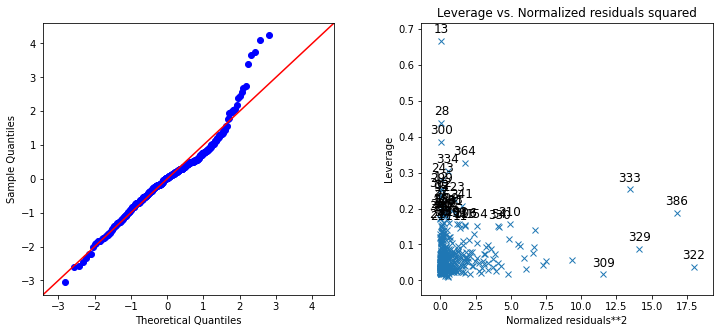

In [16]:
preds = results.predict(auto.drop(['mpg', 'name'], axis=1))
resids = auto['mpg'] - preds

diagonostic_plot(resids, results)

In [35]:
formula = 'mpg ~  cylinders - np.log(displacement) - \
                        np.sqrt(horsepower) + np.square(weight)'

results = smf.ols(formula, data = auto).fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.664    
Dependent Variable: mpg              AIC:                2329.8833
Date:               2021-09-13 15:28 BIC:                2341.8351
No. Observations:   397              Log-Likelihood:     -1161.9  
Df Model:           2                F-statistic:        392.8    
Df Residuals:       394              Prob (F-statistic): 1.51e-94 
R-squared:          0.666            Scale:              20.559   
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          38.1930   0.9462 40.3631 0.0000 36.3327 40.0533
cylinders          -1.3019   0.2945 -4.4214 0.0000 -1.8808 -0.7230
np.square(weight)  -0.0000   0.0000 -8.6490 0.0000 -0.0000 -0.0000
------------------------------------------------------------------
Omnibus:             40.928       Durbin-Watson:          0.866   
Prob(Omnibus):       0.000        Jarque-Bera (JB):       56.256  
Skew:                0.733        Prob(JB):               0.000   
Kurtosis:            4.120        Condition No.:          47388478
==================================================================
* The condition number is large (5e+07). This might indicate
strong multicollinearity or other numerical problems.
"""

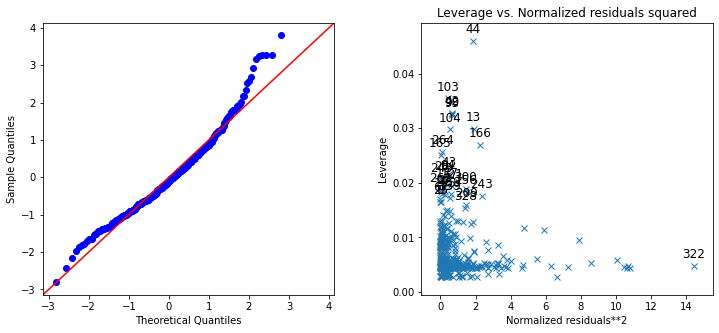

In [36]:
preds = results.predict(auto.drop(['mpg', 'name'], axis=1))
resids = auto['mpg'] - preds

diagonostic_plot(resids, results)

# EX 10

In [2]:
carseat = pd.read_csv('data/carseats.csv')
carseat.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


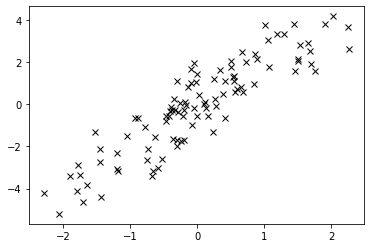

In [6]:
np.random.seed(7)

n = 100
x = np.random.normal(size=n)
y = 2 * x + np.random.normal(size=n)

plt.plot(x, y, 'kx')
plt.show()